In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


#Exploratory Data Analysis





In [3]:
df.shape

(2000, 26)

In [4]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
x = df.drop('class', axis=1)
y = df['class']

In [8]:
x.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [9]:
y.head()

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous


#Data Visualization

<ipython-input-10-1a3ab247ba2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


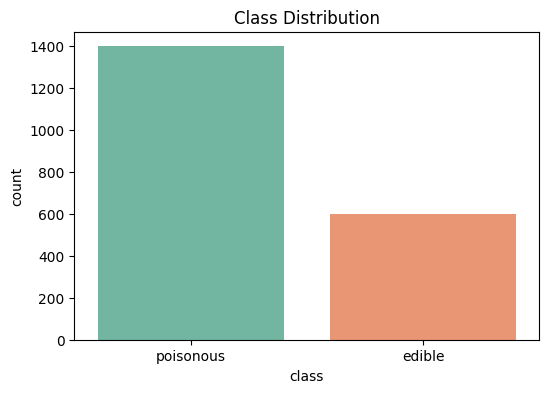

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Class Distribution')
plt.show()

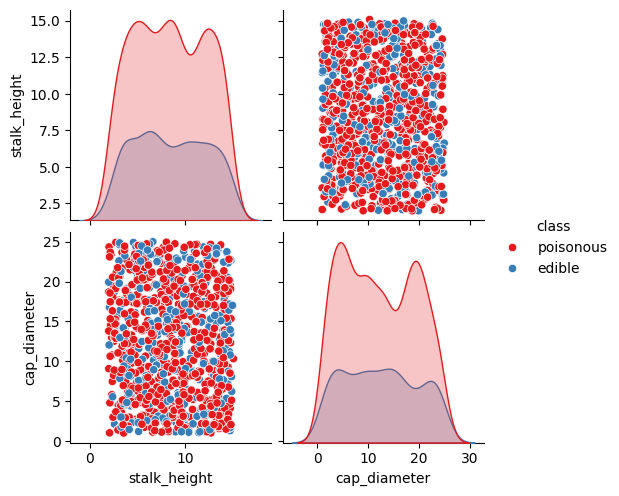

In [11]:
num_columns_with_class = df[['stalk_height', 'cap_diameter', 'class']]
sns.pairplot(num_columns_with_class, hue='class', palette='Set1')
plt.show()

#Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [13]:
cat_cols = x.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
x_encoded = pd.DataFrame(encoder.fit_transform(x[cat_cols]))

In [14]:
num_cols = x.select_dtypes(include=['int64', 'float64']).reset_index(drop=True)

In [15]:
x_encoded = pd.concat([x_encoded, num_cols], axis=1)

In [16]:
x_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,stalk_height,cap_diameter
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.276173,5.054983
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.952715,19.068319
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.054265,7.205884
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.226499,20.932692
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.037532,12.545245


In [17]:
x_encoded.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,
       ...
                   94,             95,             96,             97,
                   98,             99,            100,            101,
       'stalk_height', 'cap_diameter'],
      dtype='object', length=104)

In [18]:
x_encoded.columns = x_encoded.columns.astype(str)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 104), (600, 104), (1400,), (600,))

#SVM Implimentations and analysing their results

In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
accuracy_score(y_test, y_pred)

0.6916666666666667

In [26]:
confusion_matrix(y_test, y_pred)

array([[  0, 185],
       [  0, 415]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       185
   poisonous       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
model1 = SVC(kernel='poly')
model1.fit(x_train, y_train)

SVC(kernel='poly')

In [29]:
y_pred1 = model1.predict(x_test)

In [30]:
accuracy_score(y_test, y_pred1)

0.6933333333333334

In [31]:
model2 = SVC(kernel='rbf')
model2.fit(x_train, y_train)

SVC()

In [32]:
y_pred2 = model2.predict(x_test)

In [33]:
accuracy_score(y_test, y_pred2)

0.6916666666666667

#Parameter tunning and optimization along with the comparisions and analysis

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

In [38]:
new_model = SVC()

In [39]:
grid_search = GridSearchCV(new_model, param_grid, cv=3, scoring='accuracy')

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [41]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [42]:
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.7971513296756149


In [44]:
best_svm_model = grid_search.best_estimator_
y_test_pred = best_svm_model.predict(x_test)

In [45]:
accuracy_score(y_test, y_test_pred)

0.8533333333333334

**SVM Strengths and Weakness on mushroom dataset :**

-> From the class distribution plot, we got to know there is a class imbalance between "edible" and "poisonous" mushrooms. If one class dominates, the SVM model might struggle to learn meaningful patterns for the minority class.

-> The mushroom dataset has a large number of categorical features, which were one-hot encoded, resulting in 104 features. This can introduce sparsity in the feature space.

**Overall the strength and weakness of SVM**

Strangths:

1.It handles high dimensional data well.

2.Effective in linearly separable cases with the linear kernel.

3.Non-linear kernels (like RBF) can handle non-linear separability well.

Weakness:

1.Sensitive to class imbalance without adjustment.

2.Struggles with highly overlapping feature distributions.

3.Tuning of hyperparameters (C, gamma) is necessary and computationally expensive.




**Pratical implications of SVM in real world applications**

SVM are widely used in real-world classification tasks due to their ability to handle high-dimensional data and complex decision boundaries.

-> SVMs perform well in datasets with a large number of features, even when there are more features than samples.This is because SVMs work by finding the optimal separating hyperplane, making them less prone to overfitting in high-dimensional spaces compared to other models.

-> Using kernel functions (like RBF, polynomial, or sigmoid), SVMs can effectively model non-linear decision boundaries. This is useful in real-world applications where relationships between variables are complex and non-linear.

-> Using kernel functions (like RBF, polynomial, or sigmoid), SVMs can effectively model non-linear decision boundaries. This is useful in real-world applications where relationships between variables are complex and non-linear.